#Importing Libraries

In [1]:
import pandas as pd #Data processing
import numpy as np #Linear Algebra
import seaborn as sns #Plotting
import matplotlib.pyplot as plt #Plotting

#Loading the dataset

In [2]:
df = pd.read_csv('/content/hypothyroid.csv')

Viewing the head and tail of the dataset

In [3]:
#Viewing first five rows/columns of the dataset
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [4]:
#Viewing last five rows/columns of the dataset
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


Accessing information in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [6]:
#Checking for the number of rows and columns in the dataset
df.shape

(3163, 26)

In [7]:
#Checking for data types
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [8]:
#Checking if we have missing values in the daatset
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [9]:
#Checking for duplicates
df.duplicated().sum()

77

In [10]:
#Checking for Anomalies/ Outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


In [11]:
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

*The dataset contains 3163 rows and 26 columns

*The dataset mainly contains object/string data types

*The dataset doesn't contain any missing values

*The dataset has 77 duplicated values which we are going to deal with them in the next cell

*The dataset doesn't have outliers/anomalies

#Data Cleaning

In [12]:
#Dropping duplicated values
df.drop_duplicates(inplace = True)

In [13]:
#Confirming we still have duplicates
df.duplicated().any()

False

In [14]:
df.head(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?


*Some columns/rows in our dataset have incorrect labels (?)which will affect our analysis so we are going to drop them

In [15]:
df.drop(df[df['age'] == '?'].index, inplace=True)
df.drop(df[df['TSH'] == '?'].index, inplace=True)
df.drop(df[df['T3'] == '?'].index, inplace=True)
df.drop(df[df['TT4'] == '?'].index, inplace=True)
df.drop(df[df['T4U'] == '?'].index, inplace=True)
df.drop(df[df['FTI'] == '?'].index, inplace=True)

*Changing oject datatypes to numerical data types for our numerical columns

In [16]:
df[['age']] = df[['age']].apply(pd.to_numeric)
df[['TSH']] = df[['TSH']].apply(pd.to_numeric)
df[['T3']] = df[['T3']].apply(pd.to_numeric)
df[['TT4']] = df[['TT4']].apply(pd.to_numeric)
df[['T4U']] = df[['T4U']].apply(pd.to_numeric)
df[['FTI']] = df[['FTI']].apply(pd.to_numeric)

In [17]:
#Confirming if the change was made
df.dtypes

status                        object
age                            int64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                           object
dtype: object

#Univariate Analysis

In [18]:
# Creating a user defined function for univariate visuals 
def uni_visuals(column, kind, title, xlabel, ylabel):
  sns.set(font_scale=1.2)
  plt.figure(figsize=(7,6))
  if kind == 'pie':
    plt.pie(x=df[column].value_counts(), autopct='%1.1f%%', pctdistance=1.2)
    plt.legend(df[column].value_counts().index, bbox_to_anchor=(1.05, 1.0), loc='upper left')
  elif kind == 'bar':
    plt.bar(x=df[column].value_counts().index, height=df[column].value_counts())
    plt.xticks(rotation='vertical')
  plt.xlabel(xlabel, labelpad=14)
  plt.ylabel(ylabel, labelpad=14)
  plt.title(title, y=1.02)
  return plt.show()

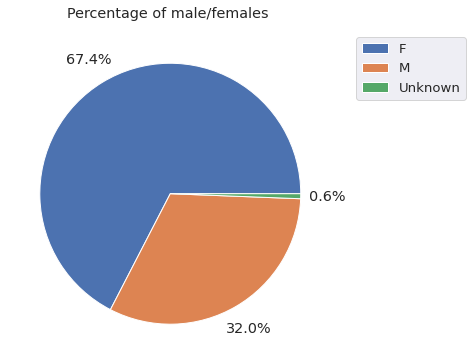

In [19]:
# Pie chart showing the percentage of males and females
df['sex'].replace({"?":"Unknown"}, inplace = True)
uni_visuals('sex', 'pie', 'Percentage of male/females ', '', '')

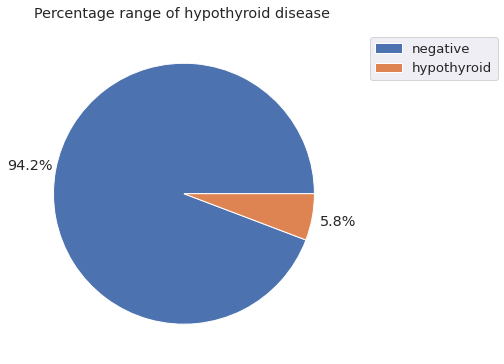

In [20]:
# Pie chart showing the percentage range of hypothyroid disease
uni_visuals('status', 'pie', 'Percentage range of hypothyroid disease ', '', '')

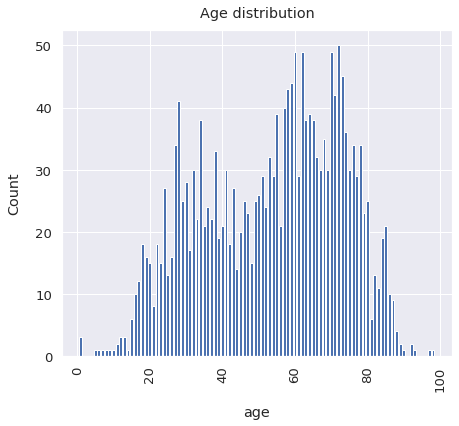

In [21]:
# Bar chart showing age count
uni_visuals('age', 'bar', 'Age distribution', 'age', 'Count')

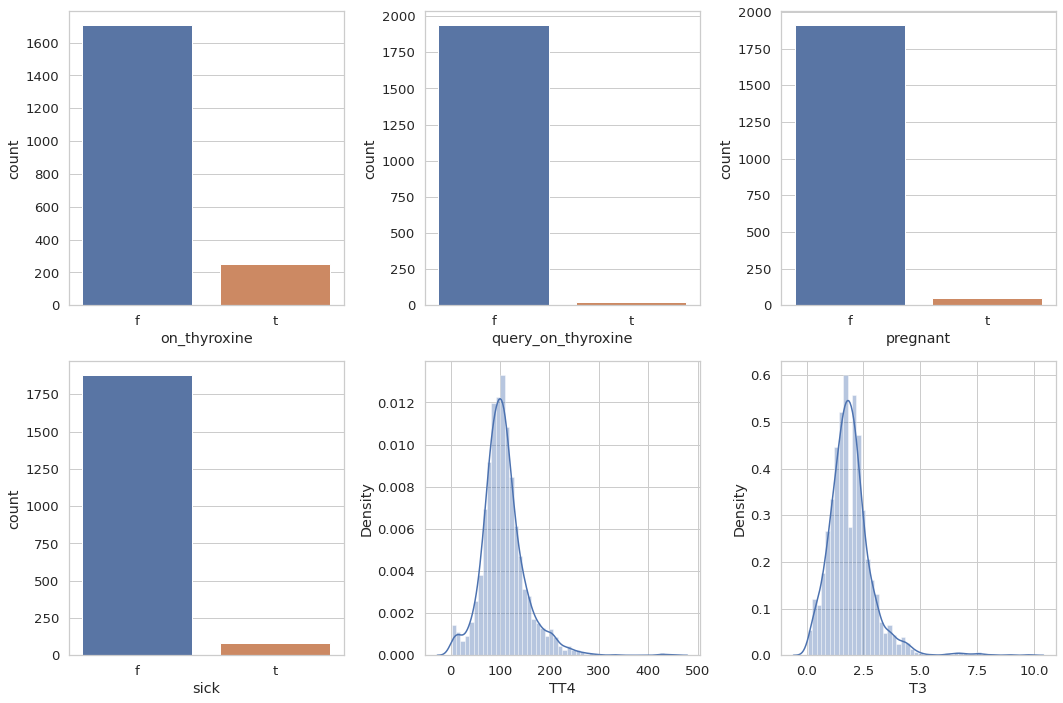

In [22]:
# Combined Univariate Analysis for some Variable
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_style('whitegrid')
fig, axes = plt.subplots(2,3, figsize=(15,10))
sns.countplot('on_thyroxine', data=df, ax=axes[0,0])
sns.countplot('query_on_thyroxine', data=df, ax=axes[0,1])
sns.countplot('pregnant', data=df, ax=axes[0,2])
sns.countplot('sick', data=df, ax=axes[1,0])
sns.distplot(df['TT4'], kde=True, ax=axes[1,1])
sns.distplot(df['T3'], kde=True, ax=axes[1,2])
plt.tight_layout()

*We have a higher percentage of females than males in the dataset

*A big percentage of the population don't have hypothyroid

*Most the population's age is between 60-80

*Most people are not on thyroxine medicine

*We have less number of sick people

#Bivariate Analysis

In [23]:
# Replacing status column with integers before performing visualization

df['status'] = df['status'].apply(lambda x:1 if x == 'hypothyroid' else 0)

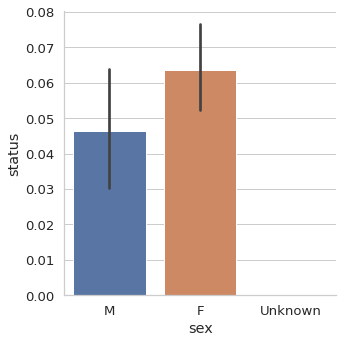

In [24]:
sns.catplot(x='sex', y='status', kind='bar', data = df)

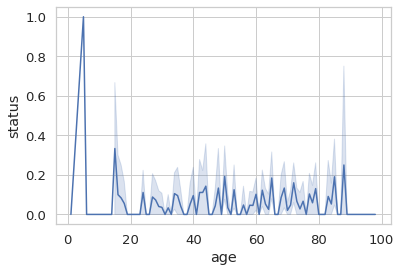

In [25]:
sns.lineplot(data=df, x=df['age'], y=df['status'])

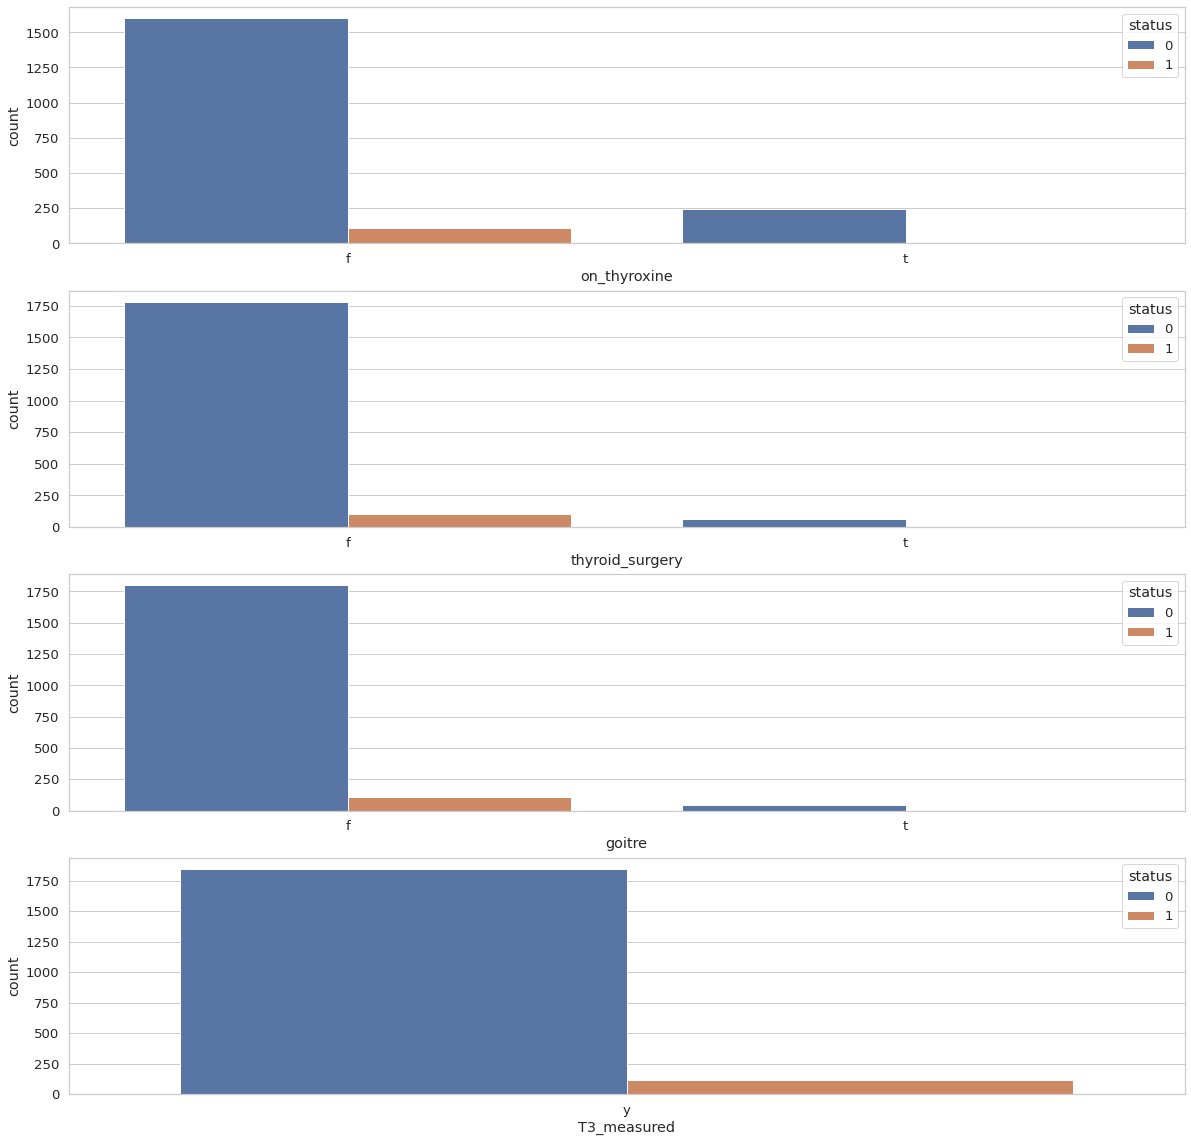

In [26]:
plt.figure(figsize = [20, 20])

plt.subplot(411)
sns.countplot(x = 'on_thyroxine', hue = 'status', data = df)

plt.subplot(412)
sns.countplot(x = 'thyroid_surgery', hue = 'status', data = df)

plt.subplot(413)
sns.countplot(x = 'goitre', hue = 'status', data = df)

plt.subplot(414)
sns.countplot(x = 'T3_measured', hue = 'status', data = df)

In [27]:
df.corr()

,status,age,TSH,T3,TT4,T4U,FTI
status,1.000000,0.025142,0.568578,-0.198521,-0.398893,0.077094,-0.467156
age,0.025142,1.000000,-0.003100,-0.339359,-0.119250,-0.242405,0.029845
TSH,0.568578,-0.003100,1.000000,-0.188571,-0.327058,0.059001,-0.378027
T3,-0.198521,-0.339359,-0.188571,1.000000,0.580324,0.497930,0.317078
TT4,-0.398893,-0.119250,-0.327058,0.580324,1.000000,0.422914,0.802350
T4U,0.077094,-0.242405,0.059001,0.497930,0.422914,1.000000,-0.149099
FTI,-0.467156,0.029845,-0.378027,0.317078,0.802350,-0.149099,1.000000


*Most females suffer from hypothyroidism compared to males

*Individuals of age less than 20 suffer from hypothyroidism

*Individuals who are not on thyroxine medication seems to be suffering from hypothyroidism

*Individuals on thyroid sugery seems to not be suffering from hypothyroidism

*From the correlation table we see that most of the variables don't have correlation with other variables

#Exploratory Data Analysis

In [28]:
#replacing '?' with zero(0) in the TBG column
df['TBG'].replace({"?": 0}, inplace = True)

In [29]:
df['TBG'].value_counts()

0     1956
28       2
Name: TBG, dtype: int64

In [30]:
df.head(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,1,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,0
1,1,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,0
2,1,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,0


#Feature Engineering

Transforming categorical variables to numerical variables for better understanding of our models

In [31]:
for col_name in df.columns:
  if(df[col_name].dtype == 'object'):
    df[col_name] = df[col_name].astype('category')
    df[col_name] = df[col_name].cat.codes

In [32]:
#Confirming if the change was made
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,1,72,1,0,0,0,0,0,0,0,0,0,0,0,0,30.0,0,0.6,0,15.0,0,1.48,0,10.0,0,0
1,1,15,0,1,0,0,0,0,0,0,0,0,0,0,0,145.0,0,1.7,0,19.0,0,1.13,0,17.0,0,0
2,1,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.2,0,4.0,0,1.00,0,0.0,0,0
3,1,24,0,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0,0.4,0,6.0,0,1.04,0,6.0,0,0
4,1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,7.3,0,1.2,0,57.0,0,1.28,0,44.0,0,0


In [33]:
#Confirming if we have correct datatypes
df.dtypes

status                         int64
age                            int64
sex                             int8
on_thyroxine                    int8
query_on_thyroxine              int8
on_antithyroid_medication       int8
thyroid_surgery                 int8
query_hypothyroid               int8
query_hyperthyroid              int8
pregnant                        int8
sick                            int8
tumor                           int8
lithium                         int8
goitre                          int8
TSH_measured                    int8
TSH                          float64
T3_measured                     int8
T3                           float64
TT4_measured                    int8
TT4                          float64
T4U_measured                    int8
T4U                          float64
FTI_measured                    int8
FTI                          float64
TBG_measured                    int8
TBG                             int8
dtype: object

#Checking for Multicollinearity

In [34]:
#Data pre-processing
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [35]:
print(X)

[[ 72.   1.   0. ...  10.   0.   0.]
 [ 15.   0.   1. ...  17.   0.   0.]
 [ 24.   1.   0. ...   0.   0.   0.]
 ...
 [ 77.   1.   0. ... 104.   0.   0.]
 [ 74.   0.   0. ... 137.   0.   0.]
 [ 56.   0.   1. ... 143.   0.   0.]]


In [36]:
print(y)

[1 1 1 ... 0 0 0]


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

x = add_constant(df)

pd.Series([variance_inflation_factor(x.values, i)
for i in range(x.shape[1])], index=x.columns)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


const                        154.188453
status                         1.711948
age                            1.192281
sex                            1.122247
on_thyroxine                   1.110985
query_on_thyroxine             1.018405
on_antithyroid_medication      1.029365
thyroid_surgery                1.018567
query_hypothyroid              1.043036
query_hyperthyroid             1.065958
pregnant                       1.211664
sick                           1.030230
tumor                          1.019951
lithium                        1.008150
goitre                         1.031498
TSH_measured                        NaN
TSH                            1.539712
T3_measured                         NaN
T3                             1.963536
TT4_measured                        NaN
TT4                           19.158561
T4U_measured                        NaN
T4U                            7.246534
FTI_measured                        NaN
FTI                           15.456875


*Apart from (TSH measured, T3 measured, T3, TT4 measured, TT4, T4U measured, T4U, FTI measured, FTI, TBG measured and TBG) the rest of the variables don't have multicollinearity

#Multivariate Analysis

#Dimensionality Reduction(LDA)

In [38]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [39]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

#1.Random Forest

#Training Random Forest Classification on the Training set

In [41]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#Predicting the Test set results

In [42]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]

#Making the Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[358   6]
 [  4  24]]


0.9744897959183674

*With Random Forest we succefully managed to build a model which has an accuracy score of 97%

#2.Ada Boosted Trees

In [44]:
#First checking the shape of our X and Y
print(X.shape, y.shape)

(1958, 25) (1958,)


In [45]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
#defining the dataset
X, y = make_classification(n_samples = 1958, n_features = 25, n_informative = 15, n_redundant = 5, random_state = 6)
model = AdaBoostClassifier()
#evaluating the model
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
n_scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1, error_score = 'raise')
# performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.800 (0.026)


*We see that with AdaBoost ensemble with default hyperparameters we achieve a classification accuracy of 80% on the test dataset

#Grid Search AdaBoost Hyperparameters

In [46]:
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
# defining dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# defining the model with default hyperparameters
model = AdaBoostClassifier()
# defining the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# defining the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# defining the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# executing the grid search
grid_result = grid_search.fit(X, y)
# summarising the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarising all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.813667 using {'learning_rate': 0.1, 'n_estimators': 500}
0.646333 (0.036376) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.646667 (0.036545) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.646667 (0.036545) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.647000 (0.038136) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.646667 (0.036545) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.647000 (0.038136) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.654333 (0.045511) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.672667 (0.046543) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.648333 (0.042197) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.671667 (0.045613) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.715000 (0.053213) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.767667 (0.045948) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.716667 (0.048876) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.767000

Compared to AdaBoost with default hyperparameters which has an accuracy score of 80% ,we used grid search to tune it and after tuning it we get a slightly higher accuracy score of 81%

#3.Support Vector Machine

#SVM Hyperparameter Tuning on different kernels with few selected features

In [53]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,1,72,1,0,0,0,0,0,0,0,0,0,0,0,0,30.0,0,0.6,0,15.0,0,1.48,0,10.0,0,0
1,1,15,0,1,0,0,0,0,0,0,0,0,0,0,0,145.0,0,1.7,0,19.0,0,1.13,0,17.0,0,0
2,1,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.2,0,4.0,0,1.00,0,0.0,0,0
3,1,24,0,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0,0.4,0,6.0,0,1.04,0,6.0,0,0
4,1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,7.3,0,1.2,0,57.0,0,1.28,0,44.0,0,0


In [54]:
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [55]:
x= df[['sex','on_thyroxine']]
y = df['status']

In [58]:
#Splitting the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Fitting the model on a polynomial function

In [59]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma= 'scale')
# Training the model using the training set
polyclassifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Plots(Visualization)

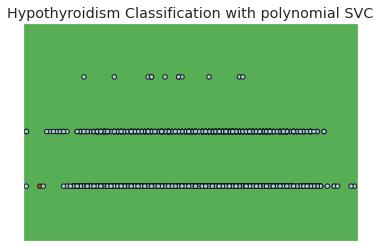

In [60]:
# Creating a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = polyclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plot
title = ('Hypothyroidism Classification with polynomial SVC')
# Setting up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, polyclassifier, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [62]:
# making prediction
y_pred = polyclassifier.predict(x_test)

In [63]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9285714285714286
[[364   0]
 [ 28   0]]


Fitting the model on Radial Basis Function(rbf)

In [64]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Plots(Visualization)

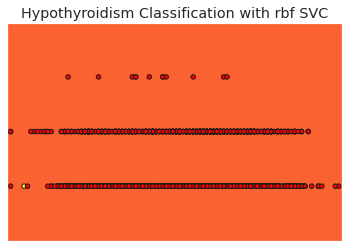

In [66]:
# Creating a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbfclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plot
title = ('Hypothyroidism Classification with rbf SVC')
# Setting up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, rbfclassifier, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [67]:
# making prediction
y_pred = rbfclassifier.predict(x_test)

In [68]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9285714285714286
[[364   0]
 [ 28   0]]


Fitting the model on linear function

In [77]:
# Building the model 
linearclassifier = SVC(kernel='linear', degree=4)
# Training the model using the training set
linearclassifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Plots(Visualization)

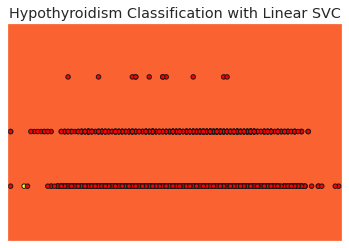

In [74]:
# Creating a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = linearclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plot
title = ('Hypothyroidism Classification with Linear SVC')
# Setting up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, linearclassifier, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [78]:
# making prediction
y_pred = linearclassifier.predict(x_test)

In [79]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9285714285714286
[[364   0]
 [ 28   0]]


All our tuned support vector machine models seem to have almost the same accuracies of 92% with few selected features 

#Creating final SVM model which has all features in our dataset

#Support Vector Machine(Linear Kernel)

Data Preprocessing

In [80]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

Splitting the dataset into Training set and Test set

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Feature Scaling

In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Training SVM model on the Training set

In [83]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Predicting the Test set results

In [84]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]

Making the Confusion Matrix

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[454   4]
 [  3  29]]


0.9857142857142858

With Support Vector Machine using Linear Kernel we managed to build the best model with an accuracy score of 98% using all features in our dataset